In [1]:
import pandas as pd
import numpy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec

from sklearn.decomposition import PCA
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

import time
from datetime import datetime 

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

start_time = datetime.now() 

In [2]:
df = pd.read_csv('sentences1138final.csv')
# df = df[df['words'] < 20]
#df = pd.read_csv('training_ex4_dl2021b.csv')
df = df[:500]
df

,sentence,mdd,t_depth,summarizing,bigrams,words,letters,word_avg,numbers,symbols,...,CC,AT,QW,REL,PRP,IN,DTT,DT,MD,stopwords
0,והנפיחות בעיניים?,3.75,4,0,1,2,15,7.500,0,1,...,0,0,0,0,0,0,0,0,0,0
1,"ככלל, כדאי להיות קשובים לגוף וכשאשר מופיעים סי...",14.82,34,1,25,25,130,5.200,0,4,...,2,0,0,0,0,0,0,0,0,2
2,הצגה עצמיתתחילה תתבקש לפרט את המחלות או הליקוי...,14.41,28,1,19,21,99,4.714,0,3,...,2,2,2,2,4,2,0,0,0,4
3,מגמת משרד החינוך הינה לשלב את הילד בעל הצרכים ...,18.42,36,1,25,26,126,4.846,0,2,...,2,2,0,2,0,4,2,0,0,4
4,"בייעוץ כזה יובאו בחשבון המסלול, משך הטיול, אופ...",19.70,43,1,24,24,139,5.792,0,8,...,0,0,2,4,2,0,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"הסיבה לקטואצידוזיס היא חוסר במנת אינסולין, מחל...",7.08,13,1,9,10,55,5.500,0,2,...,2,0,0,0,0,0,0,0,0,2
496,כתמים כחולים באזור העכוז והגב התחתון ניתן לראו...,11.00,21,1,14,15,70,4.667,0,1,...,0,0,0,0,0,2,0,0,2,1
497,יתרונות התשלום באמצעות הטלפון או האינטרנט גם ה...,10.37,19,1,14,14,75,5.357,0,1,...,4,0,0,0,0,4,0,0,2,5
498,"לשם הבהרה, מאפרה היא כלי המיועד לשמש להשלכת אפ...",9.06,16,1,12,13,59,4.538,0,2,...,0,0,0,0,0,2,0,0,0,1


In [3]:
df['sentence'] = df['sentence'].str.replace('[^\w\s]','')
#df['sentence'] = df['sentence'].str.replace('[^a-zA-z ]','')

C:\Users\jenga\AppData\Local\Temp\ipykernel_17412\1724236785.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sentence'] = df['sentence'].str.replace('[^\w\s]','')


In [4]:
df['sentence']

0                                       והנפיחות בעיניים
1      ככלל כדאי להיות קשובים לגוף וכשאשר מופיעים סימ...
2      הצגה עצמיתתחילה תתבקש לפרט את המחלות או הליקוי...
3      מגמת משרד החינוך הינה לשלב את הילד בעל הצרכים ...
4      בייעוץ כזה יובאו בחשבון המסלול משך הטיול אופיו...
                             ...                        
495    הסיבה לקטואצידוזיס היא חוסר במנת אינסולין מחלה...
496    כתמים כחולים באזור העכוז והגב התחתון ניתן לראו...
497    יתרונות התשלום באמצעות הטלפון או האינטרנט גם ה...
498    לשם הבהרה מאפרה היא כלי המיועד לשמש להשלכת אפר...
499                              קבלת חשבון ארנונה בדואל
Name: sentence, Length: 500, dtype: object

In [5]:
#X = train.drop(['id', 'label'], axis=1)
X = df['sentence']
X

0                                       והנפיחות בעיניים
1      ככלל כדאי להיות קשובים לגוף וכשאשר מופיעים סימ...
2      הצגה עצמיתתחילה תתבקש לפרט את המחלות או הליקוי...
3      מגמת משרד החינוך הינה לשלב את הילד בעל הצרכים ...
4      בייעוץ כזה יובאו בחשבון המסלול משך הטיול אופיו...
                             ...                        
495    הסיבה לקטואצידוזיס היא חוסר במנת אינסולין מחלה...
496    כתמים כחולים באזור העכוז והגב התחתון ניתן לראו...
497    יתרונות התשלום באמצעות הטלפון או האינטרנט גם ה...
498    לשם הבהרה מאפרה היא כלי המיועד לשמש להשלכת אפר...
499                              קבלת חשבון ארנונה בדואל
Name: sentence, Length: 500, dtype: object

In [6]:
y = df['summarizing']
#y = df['label']
y

0      0
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: summarizing, Length: 500, dtype: int64

In [7]:
sum(y)

440

In [8]:
# j = 0
# for i in range(len(y)):
#     if y[i]==1:
#         j+=1
# print('Num of 1\'s is: ', j)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
sentences = [w.split() for w in X_train]
print(len(sentences))
model = Word2Vec(sentences, min_count=1, vector_size=300)
print(model)

words = list(model.wv.index_to_key)
len(words)

temp = []

for s in X_train.tolist():
    temp.append(len(s.split()))

zer = numpy.array([0.0 for x in range(300)])

sen = list(X_train)
vecs = []
vecs2 = []
for s in sen:
    if len(s.split())<30:
        for w in s.split():
            vecs.append(numpy.array(model.wv.get_vector(w, norm=True)))
        if len(s.split()) == 0:
            vecs.append(zer)
        vecs2.append(numpy.array(vecs))
        vecs.clear()
    else:
        vecs2.append(numpy.array([zer for x in range(30)]))
    
for i in range(len(vecs2)):
    while len(vecs2[i])<30:
        vecs2[i] = numpy.vstack([vecs2[i], zer])

X_train_vecs = vecs2

350
Word2Vec(vocab=2802, vector_size=300, alpha=0.025)


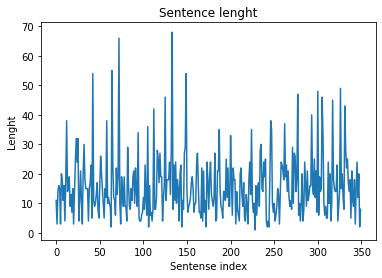

In [11]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(range(0,len(temp)), temp)                                             
plt.xlabel('Sentense index')
plt.ylabel('Lenght')
plt.xticks()
plt.title('Sentence lenght')
plt.yticks()
plt.style.use('default')
plt.show()

In [12]:
sentences = [w.split() for w in X_test]
print(len(sentences))
model = Word2Vec(sentences, min_count=1, vector_size=300)
print(model)

words = list(model.wv.index_to_key)
len(words)

temp2 = []

for s in X_test.tolist():
    temp2.append(len(s.split()))

zer = numpy.array([0.0 for x in range(300)])

sen = list(X_test)
vecs = []
vecs2 = []
for s in sen:
    if len(s.split())<30:
        for w in s.split():
            vecs.append(numpy.array(model.wv.get_vector(w, norm=True)))
        if len(s.split()) == 0:
            vecs.append(zer)
        vecs2.append(numpy.array(vecs))
        vecs.clear()
    else:
        vecs2.append(numpy.array([zer for x in range(30)]))
    
for i in range(len(vecs2)):
    while len(vecs2[i])<30:
        vecs2[i] = numpy.vstack([vecs2[i], zer])

X_test_vecs = vecs2

150
Word2Vec(vocab=1510, vector_size=300, alpha=0.025)


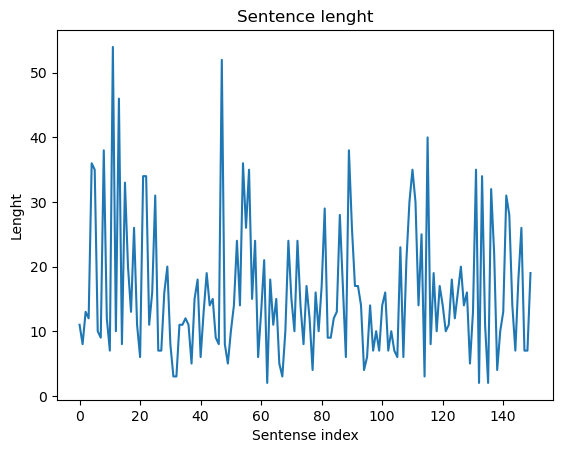

In [13]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(range(0,len(temp2)), temp2)                                             
plt.xlabel('Sentense index')
plt.ylabel('Lenght')
plt.xticks()
plt.title('Sentence lenght')
plt.yticks()
plt.style.use('default')
plt.show()

In [14]:
numpy.array(X_train_vecs).shape

(350, 30, 300)

In [15]:
y_test.shape

(150,)

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM, GRU, Dropout, Bidirectional, Embedding

In [17]:
numpy.array(X_train_vecs).shape

(350, 30, 300)

In [18]:
#model.add(GRU(40, return_sequences=True, dropout=0.5,recurrent_dropout=0.5, input_shape=(40,300)))
#model.add(GRU(40, return_sequences=False, dropout=0.5,recurrent_dropout=0.5))

#model.add(Embedding(4565, 64, input_length=300))
#model.add(Bidirectional(LSTM(64, return_sequences=False, dropout=0.5,recurrent_dropout=0.5, input_shape=(30,300)))) ### !!!
#model.add(Bidirectional(LSTM(64, return_sequences=False, input_shape=(30,300)))) ### !!!
#model.add(GRU(64,dropout=0.5))
#model.add((LSTM(32, return_sequences=False, dropout=0.5,recurrent_dropout=0.5))) #only last is false

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=False, input_shape=(30,300))))
#model.add(Bidirectional(GRU(64, return_sequences=False, input_shape=(30,300)))) ### !!!


#model.add(Dense(32,  activation='relu'))
#model.add(Dense(10,  activation=None))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(numpy.array(X_train_vecs), y_train, validation_data=(numpy.array(X_test_vecs), y_test), epochs=5, batch_size=10) ###batch size???
#model.fit(numpy.array(X_train_vecs), y_train, epochs=10, batch_size=100)

Epoch 1/5
35/35 [==============================] - 2s 19ms/step - loss: 0.5156 - accuracy: 0.8571 - val_loss: 0.3581 - val_accuracy: 0.8933
Epoch 2/5
35/35 [==============================] - 0s 6ms/step - loss: 0.3768 - accuracy: 0.8743 - val_loss: 0.3378 - val_accuracy: 0.8933
Epoch 3/5
35/35 [==============================] - 0s 6ms/step - loss: 0.3311 - accuracy: 0.8743 - val_loss: 0.3122 - val_accuracy: 0.8933
Epoch 4/5
35/35 [==============================] - 0s 7ms/step - loss: 0.2474 - accuracy: 0.9086 - val_loss: 0.4064 - val_accuracy: 0.8400
Epoch 5/5
35/35 [==============================] - 0s 6ms/step - loss: 0.1795 - accuracy: 0.9400 - val_loss: 0.4030 - val_accuracy: 0.8467


In [19]:
model.summary()

loss, accuracy = model.evaluate(numpy.array(X_train_vecs), y_train, verbose=False)
print('Train Accuracy: ', accuracy)
loss, accuracy = model.evaluate(numpy.array(X_test_vecs), y_test, verbose=False)
print('Test Accuracy: ', accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (10, 128)                186880    
 l)                                                              
                                                                 
 dropout (Dropout)           (10, 128)                 0         
                                                                 
 dense (Dense)               (10, 1)                   129       
                                                                 
Total params: 187,009
Trainable params: 187,009
Non-trainable params: 0
_________________________________________________________________
Train Accuracy:  0.9657142758369446
Test Accuracy:  0.846666693687439


In [20]:
sum(y_train)

306

In [21]:
len(y_train)

350

In [22]:
sum(y_test)

134

In [23]:
len(y_test)

150